![alt text](https://www.msengineering.ch/typo3conf/ext/nm_theme_msengineering/Resources/Public/Template/img/mse_logo.jpg "MSE Logo") 

# AnTeDe Lab 2 : Text Classification - Part C

## Session goal
The goal of this session is to perform classification on a real-world dataset. 

## The 20 newsgroups text dataset
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents from 20 different newsgroups. Supposedly, it was originally collected by Ken Lang for his paper “Newsweeder: Learning to filter netnews”. We begin by importing the previous session.

We import the dataset, which is available through __scikit_learn__. We remove the metadata (headers, footers, and quotes) so that our classifiers are only working with the text.  

In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize


categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


training_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),\
                                   shuffle=True, random_state=1, categories=categories)
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), \
                               shuffle=True, random_state=1, categories=categories)

training_corpus = training_data.data
test_corpus = test_data.data

training_labels = [training_data.target_names[item] for item in training_data.target]
test_labels = [test_data.target_names[item] for item in test_data.target]


print ('Our data is ready!')

Our data is ready!


How many training documents and how many test documents are there in the dataset?
If the answer you get is 6 of each, you made a mistake.

In [2]:
# BEGIN_REMOVE
print (str(len(training_data.data))+" training documents and "+str(len(test_data.data))+" test documents.")
# END_REMOVE

11314 training documents and 7532 test documents.


Here's the code for the evaluation.

In [3]:
def get_metrics(true_labels, predicted_labels):
        from sklearn import metrics
        import numpy as np
        print ('Accuracy:', np.round(
            metrics.accuracy_score(true_labels,
            predicted_labels), 3))
        
        from sklearn.metrics import classification_report
        print(classification_report(true_labels, predicted_labels))  

And here's our code to get the runtime of specific blocks of code.

In [4]:
import time
class ms_timer:
            
    def __enter__(self):
        self.start=time.time()
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.stop=time.time()
    def get_elapsed_time(self):
        return 1000*(self.stop-self.start)

We can implement our MNB classifier with a pipeline as follows.

In [5]:
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords


        
mnb_pipeline = Pipeline([ ('vectorizer',\
                                   CountVectorizer()),\
                        ('classifier', MultinomialNB())])

    

with ms_timer() as timer:
    mnb_pipeline.fit(training_corpus, training_labels) 
    predicted_labels = mnb_pipeline.predict(test_corpus)
    get_metrics(true_labels=test_labels,
            predicted_labels=predicted_labels)
print ("Run time for fitting/prediction/evaluation: "+str(round(timer.get_elapsed_time()/1000, 2))+" s")     

Accuracy: 0.543
                          precision    recall  f1-score   support

             alt.atheism       0.65      0.15      0.25       319
           comp.graphics       0.63      0.60      0.62       389
 comp.os.ms-windows.misc       0.33      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.54      0.66      0.60       392
   comp.sys.mac.hardware       0.82      0.42      0.55       385
          comp.windows.x       0.53      0.81      0.64       395
            misc.forsale       0.88      0.55      0.68       390
               rec.autos       0.85      0.54      0.66       396
         rec.motorcycles       0.95      0.40      0.57       398
      rec.sport.baseball       0.97      0.56      0.71       397
        rec.sport.hockey       0.57      0.78      0.66       399
               sci.crypt       0.40      0.79      0.53       396
         sci.electronics       0.70      0.38      0.49       393
                 sci.med       0.82      0.67      0.74    

Now run the same pipeline on the original corpus without the stop words. The performance improvement should be significant.

In [6]:
# BEGIN_REMOVE

mnb_pipeline = Pipeline([ ('vectorizer',\
                               CountVectorizer(stop_words='english')),\
                    ('classifier', MultinomialNB())])    

with ms_timer() as timer:
    mnb_pipeline.fit(training_corpus, training_labels) 
    predicted_labels = mnb_pipeline.predict(test_corpus)
    get_metrics(true_labels=test_labels,
            predicted_labels=predicted_labels)
print ("Run time for fitting/prediction/evaluation: "+str(round(timer.get_elapsed_time()/1000, 2))+" s") 

# END_REMOVE

Accuracy: 0.634
                          precision    recall  f1-score   support

             alt.atheism       0.65      0.30      0.41       319
           comp.graphics       0.58      0.69      0.63       389
 comp.os.ms-windows.misc       0.40      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.53      0.72      0.61       392
   comp.sys.mac.hardware       0.74      0.56      0.64       385
          comp.windows.x       0.56      0.81      0.66       395
            misc.forsale       0.85      0.69      0.76       390
               rec.autos       0.82      0.70      0.76       396
         rec.motorcycles       0.91      0.62      0.73       398
      rec.sport.baseball       0.94      0.74      0.83       397
        rec.sport.hockey       0.58      0.91      0.71       399
               sci.crypt       0.54      0.79      0.64       396
         sci.electronics       0.71      0.49      0.58       393
                 sci.med       0.81      0.79      0.80    

We can use the same code from notebook 2b to get the confusion matrix. Take a few minutes to see which categories have the greatest negative impact on the performance of the classifier.

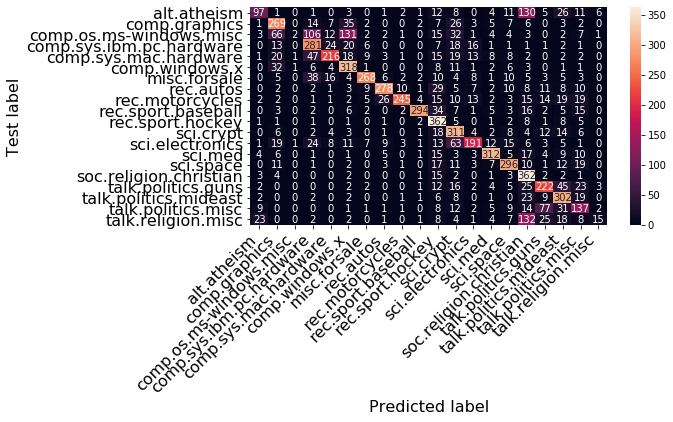

In [7]:
def pretty_confusion_matrix(true_labels, predicted_labels, target_names, base=7, height=4):

    # Based on original work by Shay Palachy
    # Original code at https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    
    import matplotlib.pyplot as plt
    import seaborn as sea
    import numpy as np
    figsize = (base, height)
    fontsize=16
    fig = plt.figure(figsize=figsize)
   
    
    from sklearn.metrics import confusion_matrix
    
    
    try:
        heatmap = sea.heatmap(confusion_matrix(true_labels, predicted_labels),\
                                  annot=True, fmt="d")
        if target_names is not None:
            tick_marks = np.arange(len(target_names))+0.5
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Test label', fontsize=fontsize)
    plt.xlabel('Predicted label', fontsize=fontsize)

pretty_confusion_matrix(test_labels, predicted_labels, categories, base=8, height=4)

In the following cell, we modify the pipeline by using TF-IDF features. 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
mnb_tfidf = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words='english')), \
                 ('trasformer', TfidfTransformer()), \
                ('classifier', MultinomialNB())])

Analyze the performance of *mnb_tfidf*.

In [9]:
# BEGIN_REMOVE

with ms_timer() as timer:
    mnb_tfidf.fit(training_corpus, training_labels) 
    predicted_labels = mnb_tfidf.predict(test_corpus)
    get_metrics(true_labels=test_labels,
            predicted_labels=predicted_labels)
print ("Run time for fitting/prediction/evaluation: "+str(round(timer.get_elapsed_time()/1000, 2))+" s") 


# END_REMOVE

Accuracy: 0.697
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.24      0.37       319
           comp.graphics       0.70      0.71      0.70       389
 comp.os.ms-windows.misc       0.69      0.59      0.64       394
comp.sys.ibm.pc.hardware       0.59      0.74      0.65       392
   comp.sys.mac.hardware       0.77      0.70      0.73       385
          comp.windows.x       0.83      0.78      0.81       395
            misc.forsale       0.81      0.74      0.77       390
               rec.autos       0.81      0.77      0.79       396
         rec.motorcycles       0.85      0.77      0.81       398
      rec.sport.baseball       0.93      0.83      0.88       397
        rec.sport.hockey       0.57      0.95      0.71       399
               sci.crypt       0.62      0.81      0.70       396
         sci.electronics       0.73      0.54      0.62       393
                 sci.med       0.89      0.78      0.83    

Now run *mnb_tfidf* without removing the stopwords and analyze its performance. Why doesn't the performance drop as much as it did with CountVectorizer?

In [10]:
# BEGIN_REMOVE
mnb_tfidf = Pipeline([ ('vectorizer', TfidfVectorizer()), \
                 ('trasformer', TfidfTransformer()), \
                ('classifier', MultinomialNB())])

with ms_timer() as timer:
    mnb_tfidf.fit(training_corpus, training_labels) 
    predicted_labels = mnb_tfidf.predict(test_corpus)
    get_metrics(true_labels=test_labels,
            predicted_labels=predicted_labels)
print ("Run time for fitting/prediction/evaluation: "+str(round(timer.get_elapsed_time()/1000, 2))+" s") 

# END_REMOVE

Accuracy: 0.675
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.16      0.26       319
           comp.graphics       0.73      0.68      0.70       389
 comp.os.ms-windows.misc       0.70      0.56      0.62       394
comp.sys.ibm.pc.hardware       0.59      0.75      0.66       392
   comp.sys.mac.hardware       0.79      0.69      0.74       385
          comp.windows.x       0.86      0.77      0.81       395
            misc.forsale       0.85      0.71      0.78       390
               rec.autos       0.83      0.76      0.79       396
         rec.motorcycles       0.87      0.73      0.79       398
      rec.sport.baseball       0.94      0.81      0.87       397
        rec.sport.hockey       0.59      0.94      0.72       399
               sci.crypt       0.54      0.80      0.65       396
         sci.electronics       0.76      0.52      0.62       393
                 sci.med       0.89      0.74      0.81    

Experiment with other classifiers (other than MNB) from *scikit-learn*. For instance, try Stochastic Gradient Descent. What's the best performance you can get using the default parametrization of the *scikit-learn* classifiers?